%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py

In [1]:
%load_ext watermark

In [2]:
%watermark?

In [3]:
watermark -d -m -v -p numpy,scipy,pandas,matplotlib,scikit-learn

19/08/2015 

CPython 3.3.5
IPython 2.1.0

numpy 1.8.1
scipy 0.14.0
pandas 0.14.0
matplotlib 1.3.1
scikit-learn 0.15.0b2

compiler   : MSC v.1600 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 23 Stepping 6, GenuineIntel
CPU cores  : 2
interpreter: 64bit


In [4]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!tail cwa17w1.txt

1     24.793     13.157     19.027    -138.335      8.896     14.450
2     26.473    -11.133     18.739     143.140      5.945    -15.115
1     25.106     13.259     19.063    -138.548      7.809     13.900
2     26.746    -11.195     18.765     143.575      5.133    -14.627
1     25.419     13.358     19.100    -138.768      6.750     13.353
2     27.015    -11.269     18.789     143.970      4.316    -14.162
1     25.738     13.456     19.128    -138.984      5.678     12.798
2     27.289    -11.333     18.807     144.377      3.496    -13.689

end


In [3]:
import numpy as np
import pandas as pd

c:\Users\USER\anaconda\envs\python3\lib\site-packages\pandas\io\excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [7]:
data = pd.read_table('cwa17w1.txt', sep='[\s]*', names=['hand', 'x', 'y', 'z', '4', '5', '6'])

left = np.asarray(data.ix[data['hand'] == '1', 'x':'z'])
right = np.asarray(data.ix[data['hand'] == '2', 'x': 'z'])

left

c:\Users\USER\anaconda\envs\python3\lib\site-packages\pandas\io\parsers.py:615: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


array([[ 24.301,  13.894,  18.324],
       [ 23.871,  13.722,  18.231],
       [ 23.502,  13.563,  18.143],
       ..., 
       [ 25.106,  13.259,  19.063],
       [ 25.419,  13.358,  19.1  ],
       [ 25.738,  13.456,  19.128]])

In [8]:
def load_data(filename):
    data = pd.read_table(filename, sep='[\s]*', names=['hand', 'x', 'y', 'z', '4', '5', '6'])
    
    left = np.asarray(data.ix[data['hand'] == '1', 'x':'z'])
    right = np.asarray(data.ix[data['hand'] == '2', 'x':'z'])
    
    return left, right

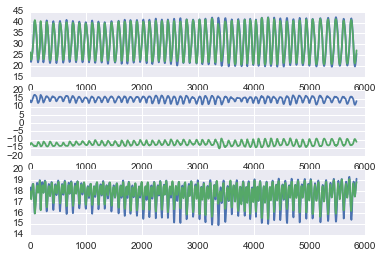

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

left, right = load_data('cwa17w1.txt')
t = np.arange(left.shape[0])
for dim in range(3):
    plt.subplot(3, 1, dim +1)
    plt.plot(t, left[:, dim],
             t, right[:, dim])

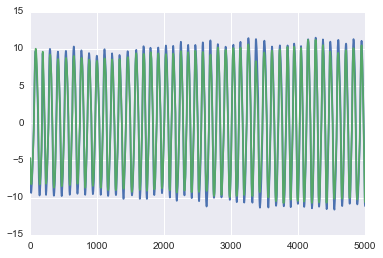

In [10]:
from sklearn.decomposition import PCA

left_1d = PCA(n_components=1).fit_transform(left)
right_1d = PCA(n_components=1).fit_transform(right)

plt.plot(t[:5000], left_1d[:5000],
         t[:5000], right_1d[:5000])

In [11]:
def collapse(data):
    return np.squeeze(PCA(n_components=1).fit_transform(data))

left_1d = collapse(left)
right_1d = collapse(right)

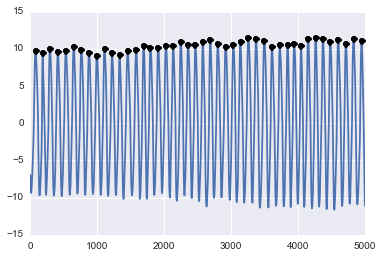

In [12]:
from scipy.signal import argrelmax

left_peaks = argrelmax(left_1d[:5000])[0]
plt.plot(t[:5000], left_1d[:5000],
         left_peaks, left_1d[left_peaks], 'ko')

<function __main__.find_and_plot_peaks>

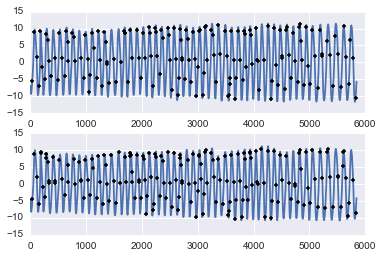

In [13]:
from scipy.signal import find_peaks_cwt
from IPython.html.widgets import interact


def find_and_plot_peaks(low=1, high=10):
    left_peaks = find_peaks_cwt(left_1d, np.arange(low, high))
    right_peaks = find_peaks_cwt(right_1d, np.arange(low, high))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, left_1d,
             left_peaks, left_1d[left_peaks], 'k.')
    plt.subplot(2, 1, 2)
    plt.plot(t, right_1d,
             right_peaks, right_1d[right_peaks], 'k.')
    

interact(find_and_plot_peaks, low=(1, 100), high=(1, 100))

In [14]:
def find_peaks(vector, cutoff=0):
    peak_idxs = argrelmax(vector)[0]
    return peak_idxs[vector[peak_idxs] > cutoff]

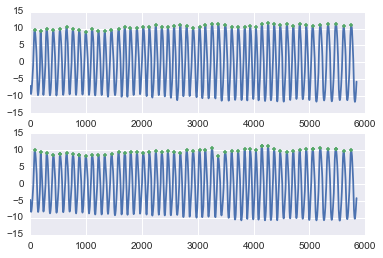

In [15]:
left_peaks = find_peaks(left_1d)
right_peaks = find_peaks(right_1d)

plt.subplot(2, 1, 1)
plt.plot(t, left_1d,
         left_peaks, left_1d[left_peaks], '.')
plt.subplot(2, 1, 2)
plt.plot(t, right_1d,
         right_peaks, right_1d[right_peaks], '.')

In [16]:
from glob import glob

def check_data(cutoff=0):
    for filename in glob('cwa17w1.txt'):
        left, right = load_data(filename)
        
        left_1d = collapse(left)
        right_1d = collapse(right)
        
        t = np.arange(left.shape[0])
        
        left_peaks = find_peaks(left_1d, cutoff=cutoff)
        right_peaks = find_peaks(right_1d, cutoff=cutoff)
        
        plt.subplot(2, 1, 1)
        plt.plot(t, left_1d,
                 left_peaks, left_1d[left_peaks], '.')
        plt.subplot(2, 1, 2)
        plt.plot(t, right_1d,
                 right_peaks, right_1d[right_peaks], '.')
        yield

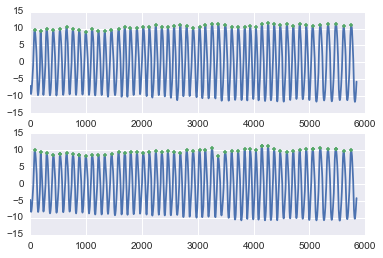

In [17]:


gen = check_data()
next(gen)

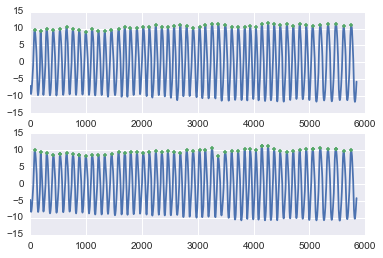

In [18]:
gen = check_data(1.75)
next(gen)

<function __main__.actually_check_data>

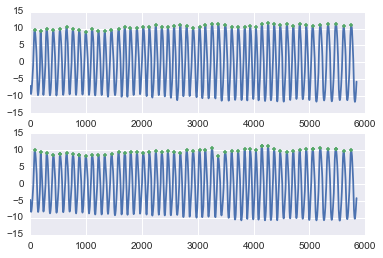

In [19]:
def actually_check_data(cutoff=0):
    gen = check_data(cutoff)
    plt.figure()
    next(gen)
   
interact(actually_check_data, cutoff=(-3., 3.))

# It looks like we're ready to continue. Let's apply the formula  ϕ j =2πt max L j −t max R j t max L j+1 −t max L j  . 

In [20]:
def discrete_relative_phase(left, right):
    left_peaks = find_peaks(collapse(left), 1.75)
    right_peaks = find_peaks(collapse(right), 1.75)
    
    min_length = min([left_peaks.shape[0], right_peaks.shape[0]])
    left_peaks = left_peaks[:min_length]
    right_peaks = right_peaks[:min_length]
    
    return 2 * np.pi * (left_peaks - right_peaks)[:-1] / np.diff(left_peaks)

In [21]:
rel_phase = discrete_relative_phase(left, right)

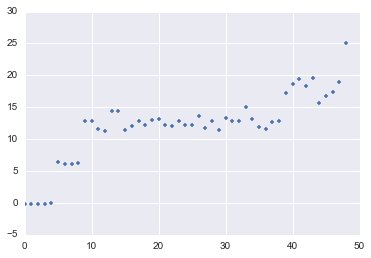

In [22]:
plt.plot(rel_phase, '.')

In [23]:
rel_phase = ((rel_phase + np.pi) % (2 * np.pi)) - np.pi

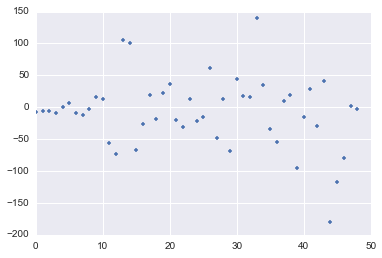

In [24]:
plt.plot(np.rad2deg(rel_phase), '.')

In [25]:
def wrap(vector):
    return ((vector + np.pi) % (2*np.pi)) - np.pi

def discrete_relative_phase(left, right):
    left_peaks = find_peaks(collapse(left))
    right_peaks = find_peaks(collapse(right))
    
    # Make sure both vectors are the same length.
    min_length = min([left_peaks.shape[0], right_peaks.shape[0]])
    left_peaks = left_peaks[:min_length]
    right_peaks = right_peaks[:min_length]
    
    return wrap(2 * np.pi * (left_peaks - right_peaks)[:-1] / np.diff(left_peaks))

In [26]:
!pip install -e hg+https://bitbucket.org/hharrison/pyphase#egg=pyphase

!hg clone http://bitbucket.org/hharrison/pyphase
!cd pyphase
!pip install

Obtaining pyphase from hg+https://bitbucket.org/hharrison/pyphase#egg=pyphase
Cleaning up...
Cannot find command 'hg'
Storing debug log for failure in c:/Users/USER\pip\pip.log


'hg' is not recognized as an internal or external command,
operable program or batch file.


You must give at least one requirement to install (see "pip help install")


In [27]:
from scipy.stats import circmean, circstd

for filename in glob('cwa17w1.txt'):
    print()
    print(filename)
    print('-' * len(filename))

    rel_phase = discrete_relative_phase(*load_data(filename))
    print('Mean: {:.2f} deg'.format(np.rad2deg(circmean(rel_phase))))
    print('SD  : {:.2f} deg'.format(np.rad2deg(circstd(rel_phase))))


cwa17w1.txt
-----------
Mean: 354.53 deg
SD  : 49.86 deg


(array([  1.,   1.,   1.,   6.,   6.,  16.,  13.,   2.,   2.,   1.]),
 array([-180.        , -148.04081633, -116.08163265,  -84.12244898,
         -52.16326531,  -20.20408163,   11.75510204,   43.71428571,
          75.67346939,  107.63265306,  139.59183673]),
 <a list of 10 Patch objects>)

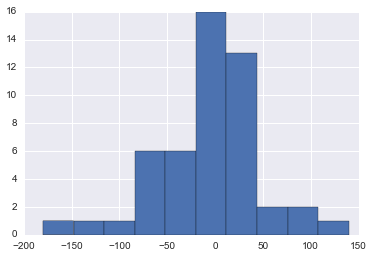

In [28]:
plt.hist(np.rad2deg(rel_phase))

In [29]:
def entropy(data, **kwargs):
    heights, _ = np.histogram(data, density=True, **kwargs)
    heights = heights[np.nonzero(heights)]
    
    return - (heights * np.log(heights)).sum(axis=0)

In [30]:
entropy(rel_phase, bins=20)

3.8540242957285384

In [4]:
np.nonzero(heights)

NameError: name 'heights' is not defined